In [63]:
import findspark

findspark.init()

In [64]:
import pyspark

from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

df = spark.sql("select 'spark' as hello ")

df.show()

+-----+
|hello|
+-----+
|spark|
+-----+



In [65]:
from io import StringIO
import pandas as pd

csv_str = """company,url
bank of america,https://www.responsibilityreports.com/Click/2522
barclays,https://www.responsibilityreports.com/Click/2297
canadian imperial bank,https://www.responsibilityreports.com/Click/1894
citigroup,https://www.responsibilityreports.com/Click/1515
eurobank,https://www.responsibilityreports.com/Click/3126
jpmorgan chase,https://www.responsibilityreports.com/Click/1278
keybank,https://www.responsibilityreports.com/Click/1599
laurentian bank of canada,https://www.responsibilityreports.com/Click/1918
national australia bank 1,https://www.responsibilityreports.com/Click/1555
national bank greece,https://www.responsibilityreports.com/Click/3104
pnc,https://www.responsibilityreports.com/Click/1829
standard chartered,https://www.responsibilityreports.com/Click/2781
tcf financial,https://www.responsibilityreports.com/Click/1669
wells fargo,https://www.responsibilityreports.com/Click/1904
ameriprise,https://www.responsibilityreports.com/Click/1784
janus henderson,https://www.responsibilityreports.com/Click/2813
t rowe price,https://www.responsibilityreports.com/Click/2044
lazard,https://www.responsibilityreports.com/Click/1429
capital one,https://www.responsibilityreports.com/Click/1640
goldman sachs,https://www.responsibilityreports.com/Click/1496
ABN AMRO Bank,https://www.responsibilityreports.com/Click/2842
Alpha Bank SA,https://www.responsibilityreports.com/Click/3049
Bank of Queensland Limited,https://www.responsibilityreports.com/Click/3241
American Assets Trust,https://www.responsibilityreports.com/Click/2336
Armada Hoffler Properties Inc,https://www.responsibilityreports.com/Click/1745
Bank OZK,https://www.responsibilityreports.com/Click/2068
Canadian Apartment Properties REIT,https://www.responsibilityreports.com/Click/2664

"""

esg_df = pd.read_csv(StringIO(csv_str))

esg_df = esg_df[1:20]
esg_df

,company,url
1,barclays,https://www.responsibilityreports.com/Click/2297
2,canadian imperial bank,https://www.responsibilityreports.com/Click/1894
3,citigroup,https://www.responsibilityreports.com/Click/1515
4,eurobank,https://www.responsibilityreports.com/Click/3126
5,jpmorgan chase,https://www.responsibilityreports.com/Click/1278
6,keybank,https://www.responsibilityreports.com/Click/1599
7,laurentian bank of canada,https://www.responsibilityreports.com/Click/1918
8,national australia bank 1,https://www.responsibilityreports.com/Click/1555
9,national bank greece,https://www.responsibilityreports.com/Click/3104
10,pnc,https://www.responsibilityreports.com/Click/1829


In [66]:
import requests
from PyPDF2 import PdfFileReader
from io import BytesIO

def extract_content(url):
  response = requests.get(url)
  open_pdf_file = BytesIO(response.content)
  pdf = PdfFileReader(open_pdf_file, strict=False)  
  text = [pdf.getPage(i).extractText() for i in range(0, pdf.getNumPages())]
  return "\n".join(text)

esg_df['content'] = esg_df['url'].apply(extract_content)
esg_df.head()

,company,url,content
1,barclays,https://www.responsibilityreports.com/Click/2297,M aking a \n\n Bar cla y s PL C\n \n En vir ...
2,canadian imperial bank,https://www.responsibilityreports.com/Click/1894,\n1\n Sustainabilit y R epor t\n \n 20 20\n˜˚...
3,citigroup,https://www.responsibilityreports.com/Click/1515,˜˚ ˜˚\n ˛˝ ˙ˆˇ\n ˙\n\n ˜˚ ˛ ˝˙ ˛ ˝ ˆ\n˜\n ˚ ˛...
4,eurobank,https://www.responsibilityreports.com/Click/3126,CORPORA TE RESPONSIBILITY REPORT\n2018\n\n ˜˚...
5,jpmorgan chase,https://www.responsibilityreports.com/Click/1278,E n v i r o n m e nt a l\n \n S o c ia l &\n...


In [67]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\t444062\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\t444062\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [68]:
import string
import re

def extract_statements(text):
  
  # remove non ASCII characters
  printable = set(string.printable)
  text = ''.join(filter(lambda x: x in printable, text))
  
  lines = []
  prev = ""
  for line in text.split('\n'):
    # aggregate consecutive lines where text may be broken down
    # only if next line starts with a space or previous does not end with a dot.
    if(line.startswith(' ') or not prev.endswith('.')):
        prev = prev + ' ' + line
    else:
        # new paragraph
        lines.append(prev)
        prev = line
        
  # don't forget left-over paragraph
  lines.append(prev)

  # clean paragraphs from extra space, unwanted characters, urls, etc.
  # best effort clean up, consider a more versatile cleaner
  sentences = []
  
  for line in lines:
      # removing header number
      line = re.sub(r'^\s?\d+(.*)$', r'\1', line)
      # removing trailing spaces
      line = line.strip()
      # words may be split between lines, ensure we link them back together
      line = re.sub(r'\s?-\s?', '-', line)
      # remove space prior to punctuation
      line = re.sub(r'\s?([,:;\.])', r'\1', line)
      # ESG contains a lot of figures that are not relevant to grammatical structure
      line = re.sub(r'\d{5,}', r' ', line)
      # remove mentions of URLs
      line = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', r' ', line)
      # remove multiple spaces
      line = re.sub(r'\s+', ' ', line)
      # remove multiple dot
      line = re.sub(r'\.+', '.', line)
      
      # split paragraphs into well defined sentences using nltk
      for part in nltk.sent_tokenize(line):
        sentences.append(str(part).strip())

  return sentences   

esg_df['statement'] = esg_df['content'].apply(extract_statements)
esg_df = esg_df.explode('statement').reset_index(drop=True)
esg_df.head()

,company,url,content,statement
0,barclays,https://www.responsibilityreports.com/Click/2297,M aking a \n\n Bar cla y s PL C\n \n En vir ...,M aking a Bar cla y s PL C En vir onmental S o...
1,barclays,https://www.responsibilityreports.com/Click/2297,M aking a \n\n Bar cla y s PL C\n \n En vir ...,W e support c onsumer s and small businesses t...
2,barclays,https://www.responsibilityreports.com/Click/2297,M aking a \n\n Bar cla y s PL C\n \n En vir ...,"In the w ak e of an e xtr aor dinar y y ear, w..."
3,barclays,https://www.responsibilityreports.com/Click/2297,M aking a \n\n Bar cla y s PL C\n \n En vir ...,Our P urpose championing inno v ation and sust...
4,barclays,https://www.responsibilityreports.com/Click/2297,M aking a \n\n Bar cla y s PL C\n \n En vir ...,Our V alues R espect W e harness the po w er o...


In [69]:
import gensim
from gensim.parsing.preprocessing import STOPWORDS


org_stop_words = [
  'plc', 'group', 'target',
  'track', 'capital', 'holding',
  'report', 'annual', 'barclay',
  'esg', 'bank', 'report', 'csr',
  'disclosure', 'sustainable', 'sustainability'
  'corporate', 'responsibility',
  'million', 'billion',
]


organisations = set(esg_df['company'])
for organisation in organisations:
    for t in organisation.split(' '):
        org_stop_words.append(t)


stop_words = STOPWORDS.union(org_stop_words)

In [70]:
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from gensim.utils import simple_preprocess

def lemmatize(text):
  results = []
  lemmatizer = WordNetLemmatizer()
  stemmer = PorterStemmer()
  for token in simple_preprocess(text):
    stem = stemmer.stem(lemmatizer.lemmatize(token))
    if (len(stem) > 3):
      results.append(stem)
  return ' '.join(results)

esg_df['lemma'] = esg_df['statement'].apply(lemmatize)
esg_df = esg_df[esg_df['lemma'].str.len() > 100]
corpus = esg_df.lemma
esg_df

,company,url,content,statement,lemma
7,barclays,https://www.responsibilityreports.com/Click/2297,M aking a \n\n Bar cla y s PL C\n \n En vir ...,"Ex c ellenc e W e champion inno v ation, and u...",ellenc champion inno ation ener xpertis esour ...
8,barclays,https://www.responsibilityreports.com/Click/2297,M aking a \n\n Bar cla y s PL C\n \n En vir ...,Y ou can r ead mor e about our ne w P urpose O...,about urpos ehold ving urpos ensur deliv stak ...
13,barclays,https://www.responsibilityreports.com/Click/2297,M aking a \n\n Bar cla y s PL C\n \n En vir ...,In v esting in our c ommunities 22 32 42 57 66...,ommun ddition disclosur ernanc ernal benchmark...
15,barclays,https://www.responsibilityreports.com/Click/2297,M aking a \n\n Bar cla y s PL C\n \n En vir ...,An o v er vie w of the Gr oup s appr oach t o ...,appr oach build inclusiv ompan includ eport gl...
18,barclays,https://www.responsibilityreports.com/Click/2297,M aking a \n\n Bar cla y s PL C\n \n En vir ...,Bar cla y s E S G R eporting F r ame w ork and...,eport sustain financ polici stat ement esent o...
...,...,...,...,...,...
9667,goldman sachs,https://www.responsibilityreports.com/Click/1496,G o l d m a n S a c h s 2 0 2 0 S u s t ai n ...,W e h a v e e m b r a c e d su s t a i n a b i...,bili bili bili bili reasuri cash manag ransact...
9685,goldman sachs,https://www.responsibilityreports.com/Click/1496,G o l d m a n S a c h s 2 0 2 0 S u s t ai n ...,2 2 T H E L AR G E ST- E VE R U S-L IST E D IP...,design develop world most sustain electr vehic...
9705,goldman sachs,https://www.responsibilityreports.com/Click/1496,G o l d m a n S a c h s 2 0 2 0 S u s t ai n ...,52 O u r F i r m G o l d m a n S a c h s 2 0 2...,otal deal review power gener metal mine chemic...
9800,goldman sachs,https://www.responsibilityreports.com/Click/1496,G o l d m a n S a c h s 2 0 2 0 S u s t ai n ...,P r on ou n s I n i t ia t i v e I n c l u s i...,global asian network global region black hispa...


### Hyperparameter tuning

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
  stop_words = stop_words,
  ngram_range = (1,1)
)

vec_model = vectorizer.fit(corpus)

In [72]:
from sklearn.decomposition import LatentDirichletAllocation
from hyperopt import fmin, hp, tpe, SparkTrials, STATUS_OK
import numpy as np


def train_model(params):
  
  lda = LatentDirichletAllocation(
    n_components=int(params['n_components']),
    learning_method='batch',
    learning_decay=float(params['learning_decay']),
    max_iter=150,
    n_jobs= 5,
    evaluate_every=3,
    random_state=42, 
    verbose=True
  )
  
  X = vec_model.transform(corpus)
  lda.fit(X)

  loss = lda.perplexity(X)
  return {'status': STATUS_OK, 'loss': loss}

In [73]:
search_space = {
  'n_components': hp.quniform('n_components', 5, 12, 1),
  'learning_decay': hp.quniform('learning_decay', 0.65, 0.8, 0.05),
}

best_params = fmin(
  fn=train_model, 
  space=search_space, 
  algo=tpe.suggest, 
  max_evals=20, 
  trials=SparkTrials(), 
  rstate=np.random.default_rng(123)
)

Because the requested parallelism was None or a non-positive value, parallelism will be set to (16), which is Spark's default parallelism (16), or 1, whichever is greater. We recommend setting parallelism explicitly to a positive value because the total of Spark task slots is subject to cluster sizing.


100%|████████████████████████████████████████████████| 20/20 [01:59<00:00,  5.98s/trial, best loss: 1540.6063202511073]


Total Trials: 20: 20 succeeded, 0 failed, 0 cancelled.


In [74]:
best_params

{'learning_decay': 0.8, 'n_components': 5.0}

In [75]:
import mlflow
from sklearn.pipeline import make_pipeline

with mlflow.start_run(run_name='esg_lda') as run:

  lda = LatentDirichletAllocation(
    n_components=int(best_params['n_components']),
    learning_decay=float(best_params['learning_decay']),
    learning_method='batch',
    max_iter=150,
    n_jobs=5,
#       int(getParam("num_executors")),
    evaluate_every=3,
    random_state=42,
    verbose=True
  )
  
  mlflow.log_param("n_components", best_params['n_components'])
  mlflow.log_param("learning_decay", best_params['learning_decay'])
  
  # train pipeline
  pipeline = make_pipeline(vec_model, lda)
  pipeline.fit(corpus)

  # log model
  mlflow.sklearn.log_model(pipeline, 'pipeline')
  
  # Mlflow run ID
  lda_run_id = mlflow.active_run().info.run_id

iteration: 1 of max_iter: 150
iteration: 2 of max_iter: 150
iteration: 3 of max_iter: 150, perplexity: 2036.7921
iteration: 4 of max_iter: 150
iteration: 5 of max_iter: 150
iteration: 6 of max_iter: 150, perplexity: 1810.1491
iteration: 7 of max_iter: 150
iteration: 8 of max_iter: 150
iteration: 9 of max_iter: 150, perplexity: 1693.0865
iteration: 10 of max_iter: 150
iteration: 11 of max_iter: 150
iteration: 12 of max_iter: 150, perplexity: 1638.4939
iteration: 13 of max_iter: 150
iteration: 14 of max_iter: 150
iteration: 15 of max_iter: 150, perplexity: 1608.8073
iteration: 16 of max_iter: 150
iteration: 17 of max_iter: 150
iteration: 18 of max_iter: 150, perplexity: 1590.8396
iteration: 19 of max_iter: 150
iteration: 20 of max_iter: 150
iteration: 21 of max_iter: 150, perplexity: 1577.3171
iteration: 22 of max_iter: 150
iteration: 23 of max_iter: 150
iteration: 24 of max_iter: 150, perplexity: 1569.0637
iteration: 25 of max_iter: 150
iteration: 26 of max_iter: 150
iteration: 27 of ma

In [76]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda, vectorizer.transform(corpus), vectorizer, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3      150.222153  -72.269554       1        1  27.189840
4       51.163364 -159.968018       2        1  25.010135
2      -73.144554   21.523815       3        1  19.176482
1      -66.410133 -110.606438       4        1  15.849228
0       54.417324   12.443444       5        1  12.774315, topic_info=        Term        Freq       Total Category  logprob  loglift
5944    tion  784.000000  784.000000  Default  30.0000  30.0000
863     busi  435.000000  435.000000  Default  29.0000  29.0000
905    capit  420.000000  420.000000  Default  28.0000  28.0000
2153   eport  311.000000  311.000000  Default  27.0000  27.0000
2221  ernanc  371.000000  371.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
2940   human   41.355401  168.712451   Topic5  -5.3783   0.6517
5427  social   43.252235  259.168774   Topic5  -5.3335   0.2673
4517    ough   42.451028  314.259401   Topic5  -5.3522   0.0559
450     appr   41.797484  355.782766   Topic5  -5.3677  -0.0838
4043   oduct   39.068337  234.442312   Topic5  -5.4352   0.2658

[345 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
58        4  0.035090       acti
58        5  0.947440       acti
171       2  0.955869  ainabilit
173       1  0.947491      ainin
241       4  0.960460      allow
...     ...       ...        ...
6422      4  0.923388       whil
6462      1  0.986316      woman
6463      1  0.961752       work
6463      4  0.030371       work
6485      3  0.974621     xhibit

[535 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 3, 2, 1])

In [77]:
topics = [str(x) for x in list(np.arange(0, int(best_params['n_components'])))]

In [78]:
topics

['0', '1', '2', '3', '4']

In [79]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def word_cloud(model, tf_feature_names, index):
    
    imp_words_topic=""
    comp = model.components_[index]
    tfs = ['_'.join(t.split(' ')) for t in tf_feature_names]
    vocab_comp = zip(tfs, comp)
    sorted_words = sorted(vocab_comp, key = lambda x:x[1], reverse=True)[:200]
    
    for word in sorted_words:
        imp_words_topic = imp_words_topic + " " + word[0]
    
    return WordCloud(
        background_color="white",
        width=800, 
        height=800, 
        contour_width=2, 
        contour_color='steelblue'
    ).generate(imp_words_topic)
    



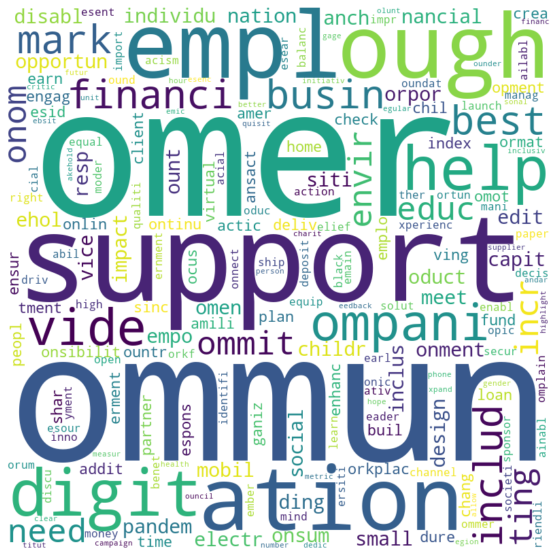

In [80]:
tf_feature_names = vec_model.get_feature_names()
wordcloud = word_cloud(lda, tf_feature_names, 1)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

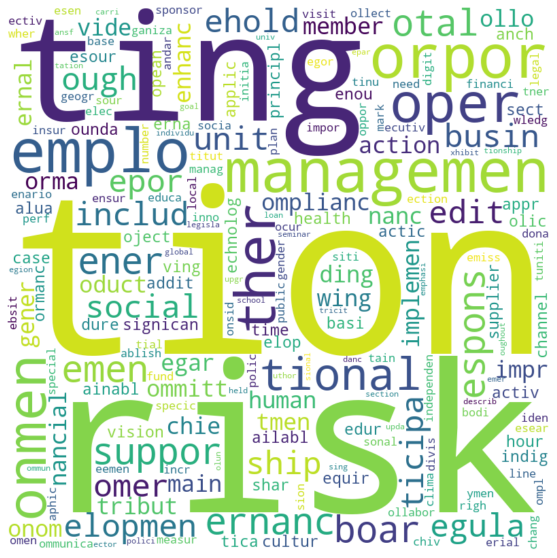

In [81]:
tf_feature_names = vec_model.get_feature_names()
wordcloud = word_cloud(lda, tf_feature_names, 2)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

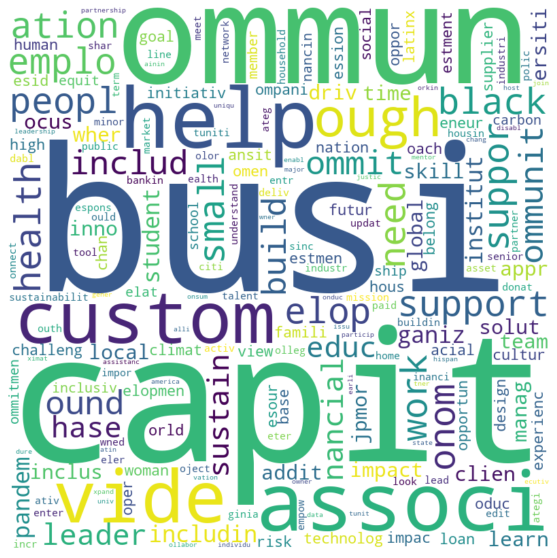

In [82]:
tf_feature_names = vec_model.get_feature_names()
wordcloud = word_cloud(lda, tf_feature_names, 3)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

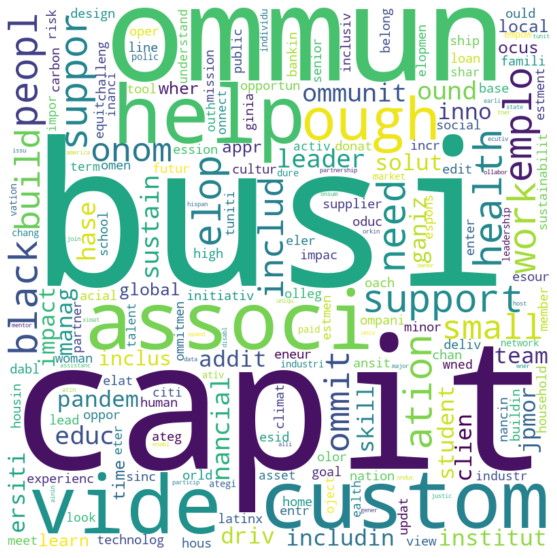

In [83]:
tf_feature_names = vec_model.get_feature_names()
wordcloud = word_cloud(lda, tf_feature_names, 3)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [84]:
topic_names = [
  [0, "G", "customer obsessed"],
  [1, "S", "valuing employees"],
  [2, "G", "code of conduct"],
  [3, "E", "energy transition"],
  [4, "S", "community support"],
]

topic_names_df = pd.DataFrame(topic_names, columns=['id', 'topic', 'policy'])



In [85]:
topic_names_df.describe

<bound method NDFrame.describe of    id topic             policy
0   0     G  customer obsessed
1   1     S  valuing employees
2   2     G    code of conduct
3   3     E  energy transition
4   4     S  community support>

In [86]:
spark \
  .createDataFrame(topic_names_df) \
  .write \
  .format('delta') \
  .mode('overwrite') \

In [87]:
topic_names_df.describe

<bound method NDFrame.describe of    id topic             policy
0   0     G  customer obsessed
1   1     S  valuing employees
2   2     G    code of conduct
3   3     E  energy transition
4   4     S  community support>

In [88]:

esg_predictions = esg_df.drop(columns=['content', 'lemma'], axis=1)
esg_predictions['probabilities'] = pipeline.transform(corpus).tolist()



In [89]:
df_spark = spark \
  .createDataFrame(esg_predictions) \
  .select('company', 'url', 'statement', 'probabilities') \

In [90]:
df = df_spark.toPandas()

In [92]:
df

,company,url,statement,probabilities
0,barclays,https://www.responsibilityreports.com/Click/2297,"Ex c ellenc e W e champion inno v ation, and u...","[0.32265562313135493, 0.012949326103723968, 0...."
1,barclays,https://www.responsibilityreports.com/Click/2297,Y ou can r ead mor e about our ne w P urpose O...,"[0.0035105346169016197, 0.32671008914528643, 0..."
2,barclays,https://www.responsibilityreports.com/Click/2297,In v esting in our c ommunities 22 32 42 57 66...,"[0.005762576916834455, 0.0058503906506613525, ..."
3,barclays,https://www.responsibilityreports.com/Click/2297,An o v er vie w of the Gr oup s appr oach t o ...,"[0.01183352807015881, 0.19140559581398223, 0.0..."
4,barclays,https://www.responsibilityreports.com/Click/2297,Bar cla y s E S G R eporting F r ame w ork and...,"[0.006540059506065654, 0.006554019745061375, 0..."
...,...,...,...,...
2565,goldman sachs,https://www.responsibilityreports.com/Click/1496,W e h a v e e m b r a c e d su s t a i n a b i...,"[0.3039004023438577, 0.09525294018189084, 0.00..."
2566,goldman sachs,https://www.responsibilityreports.com/Click/1496,2 2 T H E L AR G E ST- E VE R U S-L IST E D IP...,"[0.0051449464548262245, 0.18044405386868978, 0..."
2567,goldman sachs,https://www.responsibilityreports.com/Click/1496,52 O u r F i r m G o l d m a n S a c h s 2 0 2...,"[0.01504420707609745, 0.013401987568153537, 0...."
2568,goldman sachs,https://www.responsibilityreports.com/Click/1496,P r on ou n s I n i t ia t i v e I n c l u s i...,"[0.38305884303771814, 0.006736942186509798, 0...."


In [93]:
# df = spark.read.table(getParam('csr_statements_table')).toPandas()
df['id'] = df['probabilities'].apply(lambda x: np.argmax(x))
df['probability'] = df['probabilities'].apply(lambda x: np.max(x))

spark \
  .createDataFrame(df.merge(topic_names_df, on='id').drop(['probabilities', 'id', 'url'], axis=1)) \
  .createOrReplaceTempView('csr')

In [94]:
test = spark.sql("select * from csr ")

In [95]:
display(test)

DataFrame[company: string, statement: string, probability: double, topic: string, policy: string]

In [96]:
# test2 = pd.read_sql_query("SELECT * FROM csr")

In [97]:
# %%sql
# WITH sorted_csr AS (
#   SELECT 
#     company, 
#     statement, 
#     probability, 
#     policy, 
#     dense_rank() OVER (PARTITION BY company, policy ORDER BY probability DESC) rank FROM csr
#   WHERE probability > 0.98
# )

# SELECT company, statement, policy
# FROM sorted_csr
# WHERE rank = 1
# ORDER BY company DESC

In [98]:
df2 = df.copy()

In [99]:
df['topics'] = df['probabilities'].apply(lambda xs: [[i, x] for i, x in enumerate(xs)])
df = df.explode('topics').reset_index(drop=True)
df['id'] = df['topics'].apply(lambda x: x[0])
df['probability'] = df['topics'].apply(lambda x: x[1])
df = df[['company', 'id', 'probability']]
df = df.merge(topic_names_df, on='id')
df = pd.pivot_table(
  df, 
  values='probability', 
  index='company',
  columns=['policy'], 
  aggfunc=np.sum)

In [100]:
df

policy,code of conduct,community support,customer obsessed,energy transition,valuing employees
company,,,,,
ameriprise,0.682740,0.430494,0.205718,0.665221,1.015827
barclays,8.999872,166.498820,7.219241,29.395801,25.886265
canadian imperial bank,25.411779,216.833103,7.600685,44.206138,28.948295
capital one,17.802259,28.877891,14.031680,352.383446,119.904724
eurobank,16.089314,5.732931,235.817410,8.541881,12.818465
goldman sachs,1.643923,0.982526,0.727749,1.499452,1.146350
janus henderson,0.063686,1.417887,0.883851,2.627280,1.007296
jpmorgan chase,81.584571,36.280564,11.829601,258.014855,15.290408
keybank,0.603865,0.009905,0.009964,0.366722,0.009544


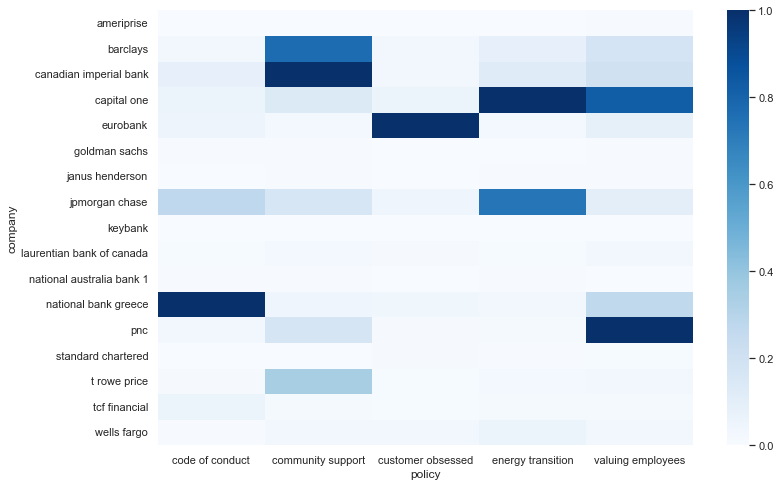

In [101]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
esg_focus = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
esg_focus.index = df.index


import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(esg_focus, annot=False, cmap='Blues')
plt.show()

In [102]:
df

policy,code of conduct,community support,customer obsessed,energy transition,valuing employees
company,,,,,
ameriprise,0.682740,0.430494,0.205718,0.665221,1.015827
barclays,8.999872,166.498820,7.219241,29.395801,25.886265
canadian imperial bank,25.411779,216.833103,7.600685,44.206138,28.948295
capital one,17.802259,28.877891,14.031680,352.383446,119.904724
eurobank,16.089314,5.732931,235.817410,8.541881,12.818465
goldman sachs,1.643923,0.982526,0.727749,1.499452,1.146350
janus henderson,0.063686,1.417887,0.883851,2.627280,1.007296
jpmorgan chase,81.584571,36.280564,11.829601,258.014855,15.290408
keybank,0.603865,0.009905,0.009964,0.366722,0.009544


In [103]:
esg_focus

policy,code of conduct,community support,customer obsessed,energy transition,valuing employees
company,,,,,
ameriprise,0.002066,0.001940,0.000830,0.000848,0.006904
barclays,0.029821,0.767856,0.030573,0.082465,0.177525
canadian imperial bank,0.084590,1.000000,0.032190,0.124538,0.198532
capital one,0.059196,0.133141,0.059463,1.000000,0.822531
eurobank,0.053480,0.026395,1.000000,0.023224,0.087875
goldman sachs,0.005273,0.004486,0.003044,0.003218,0.007799
janus henderson,0.000000,0.006494,0.003706,0.006422,0.006845
jpmorgan chase,0.272047,0.167282,0.050124,0.731920,0.104833
keybank,0.001803,0.000000,0.000000,0.000000,0.000000


In [104]:
esg_focus[~esg_focus['code of conduct'].notnull()]

policy,code of conduct,community support,customer obsessed,energy transition,valuing employees
company,,,,,


In [105]:
df.columns

Index(['code of conduct', 'community support', 'customer obsessed',
       'energy transition', 'valuing employees'],
      dtype='object', name='policy')

In [106]:
topic_names

[[0, 'G', 'customer obsessed'],
 [1, 'S', 'valuing employees'],
 [2, 'G', 'code of conduct'],
 [3, 'E', 'energy transition'],
 [4, 'S', 'community support']]

In [107]:
policy_list = topic_names_df['policy'].unique().tolist()
policy_list

['customer obsessed',
 'valuing employees',
 'code of conduct',
 'energy transition',
 'community support']

In [109]:
esg_prediction = esg_predictions.copy

In [110]:
esg_predictions

,company,url,statement,probabilities
7,barclays,https://www.responsibilityreports.com/Click/2297,"Ex c ellenc e W e champion inno v ation, and u...","[0.32265562313135493, 0.012949326103723968, 0...."
8,barclays,https://www.responsibilityreports.com/Click/2297,Y ou can r ead mor e about our ne w P urpose O...,"[0.0035105346169016197, 0.32671008914528643, 0..."
13,barclays,https://www.responsibilityreports.com/Click/2297,In v esting in our c ommunities 22 32 42 57 66...,"[0.005762576916834455, 0.0058503906506613525, ..."
15,barclays,https://www.responsibilityreports.com/Click/2297,An o v er vie w of the Gr oup s appr oach t o ...,"[0.01183352807015881, 0.19140559581398223, 0.0..."
18,barclays,https://www.responsibilityreports.com/Click/2297,Bar cla y s E S G R eporting F r ame w ork and...,"[0.006540059506065654, 0.006554019745061375, 0..."
...,...,...,...,...
9667,goldman sachs,https://www.responsibilityreports.com/Click/1496,W e h a v e e m b r a c e d su s t a i n a b i...,"[0.3039004023438577, 0.09525294018189084, 0.00..."
9685,goldman sachs,https://www.responsibilityreports.com/Click/1496,2 2 T H E L AR G E ST- E VE R U S-L IST E D IP...,"[0.0051449464548262245, 0.18044405386868978, 0..."
9705,goldman sachs,https://www.responsibilityreports.com/Click/1496,52 O u r F i r m G o l d m a n S a c h s 2 0 2...,"[0.01504420707609745, 0.013401987568153537, 0...."
9800,goldman sachs,https://www.responsibilityreports.com/Click/1496,P r on ou n s I n i t ia t i v e I n c l u s i...,"[0.38305884303771814, 0.006736942186509798, 0...."


In [111]:
df.head()

policy,code of conduct,community support,customer obsessed,energy transition,valuing employees
company,,,,,
ameriprise,0.682740,0.430494,0.205718,0.665221,1.015827
barclays,8.999872,166.498820,7.219241,29.395801,25.886265
canadian imperial bank,25.411779,216.833103,7.600685,44.206138,28.948295
capital one,17.802259,28.877891,14.031680,352.383446,119.904724
eurobank,16.089314,5.732931,235.817410,8.541881,12.818465


In [112]:
df2

,company,url,statement,probabilities,id,probability
0,barclays,https://www.responsibilityreports.com/Click/2297,"Ex c ellenc e W e champion inno v ation, and u...","[0.32265562313135493, 0.012949326103723968, 0....",3,0.530737
1,barclays,https://www.responsibilityreports.com/Click/2297,Y ou can r ead mor e about our ne w P urpose O...,"[0.0035105346169016197, 0.32671008914528643, 0...",4,0.662709
2,barclays,https://www.responsibilityreports.com/Click/2297,In v esting in our c ommunities 22 32 42 57 66...,"[0.005762576916834455, 0.0058503906506613525, ...",4,0.976783
3,barclays,https://www.responsibilityreports.com/Click/2297,An o v er vie w of the Gr oup s appr oach t o ...,"[0.01183352807015881, 0.19140559581398223, 0.0...",4,0.772905
4,barclays,https://www.responsibilityreports.com/Click/2297,Bar cla y s E S G R eporting F r ame w ork and...,"[0.006540059506065654, 0.006554019745061375, 0...",4,0.973756
...,...,...,...,...,...,...
2565,goldman sachs,https://www.responsibilityreports.com/Click/1496,W e h a v e e m b r a c e d su s t a i n a b i...,"[0.3039004023438577, 0.09525294018189084, 0.00...",4,0.591046
2566,goldman sachs,https://www.responsibilityreports.com/Click/1496,2 2 T H E L AR G E ST- E VE R U S-L IST E D IP...,"[0.0051449464548262245, 0.18044405386868978, 0...",3,0.458832
2567,goldman sachs,https://www.responsibilityreports.com/Click/1496,52 O u r F i r m G o l d m a n S a c h s 2 0 2...,"[0.01504420707609745, 0.013401987568153537, 0....",2,0.944771
2568,goldman sachs,https://www.responsibilityreports.com/Click/1496,P r on ou n s I n i t ia t i v e I n c l u s i...,"[0.38305884303771814, 0.006736942186509798, 0....",3,0.596774


In [113]:
df2.groupby(['company'])['probability'].mean()

company
ameriprise                   0.556680
barclays                     0.782672
canadian imperial bank       0.753445
capital one                  0.747478
eurobank                     0.869537
goldman sachs                0.635389
janus henderson              0.755426
jpmorgan chase               0.721666
keybank                      0.603865
laurentian bank of canada    0.812352
national australia bank 1    0.663026
national bank greece         0.855892
pnc                          0.792800
standard chartered           0.792611
t rowe price                 0.822076
tcf financial                0.675358
wells fargo                  0.631729
Name: probability, dtype: float64

#### 